- Karaoke Box Chain
- Revenue =  Avg Sales Price * Visit Count 
    - Visit Count = Registered Members * Avg Visits
- COGS

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

In [2]:
storelst = "Shinjuku Central_Harajuku Boulevard_Shinagawa Square_Tokyo Bay_Yokohama Port_Osaka Metro_Osaka Sunset Plaza_Nagoya Tower_Hakata Outlet_Okinawa Seaside".split("_")
storelst

['Shinjuku Central',
 'Harajuku Boulevard',
 'Shinagawa Square',
 'Tokyo Bay',
 'Yokohama Port',
 'Osaka Metro',
 'Osaka Sunset Plaza',
 'Nagoya Tower',
 'Hakata Outlet',
 'Okinawa Seaside']

In [3]:
np.random.seed(0)
sales = np.random.randint(16000,170000,len(storelst))
sales = np.sort(sales)[::-1]
sales

array([168315, 138579, 133952, 128420, 113639, 111939, 102293,  64600,
        59567,  57993])

In [4]:
np.random.seed(0)
totalvisits = np.random.randint(100,280,10)
np.sort(totalvisits)[::-1]
totalvisits

array([272, 147, 217, 167, 203, 109, 121, 136, 187, 170])

In [5]:
np.random.seed(0)
membercnt = np.random.randint(110,210,10)
np.sort(membercnt)[::-1]
membercnt

array([154, 157, 174, 177, 177, 119, 193, 131, 146, 197])

In [6]:
# starting point data
pd.DataFrame(np.concatenate([[sales], [totalvisits], [membercnt]], axis=0)).T

,0,1,2
0,168315,272,154
1,138579,147,157
2,133952,217,174
3,128420,167,177
4,113639,203,177
5,111939,109,119
6,102293,121,193
7,64600,136,131
8,59567,187,146
9,57993,170,197


In [7]:
sdate = date(2020,4,30)
edate = date(2022,3,31)
datelst = pd.date_range(sdate,edate,freq='m')
datelst[:,None]

C:\Users\ochib\AppData\Local\Temp\ipykernel_26076\151309266.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  datelst[:,None]


array([['2020-04-30T00:00:00.000000000'],
       ['2020-05-31T00:00:00.000000000'],
       ['2020-06-30T00:00:00.000000000'],
       ['2020-07-31T00:00:00.000000000'],
       ['2020-08-31T00:00:00.000000000'],
       ['2020-09-30T00:00:00.000000000'],
       ['2020-10-31T00:00:00.000000000'],
       ['2020-11-30T00:00:00.000000000'],
       ['2020-12-31T00:00:00.000000000'],
       ['2021-01-31T00:00:00.000000000'],
       ['2021-02-28T00:00:00.000000000'],
       ['2021-03-31T00:00:00.000000000'],
       ['2021-04-30T00:00:00.000000000'],
       ['2021-05-31T00:00:00.000000000'],
       ['2021-06-30T00:00:00.000000000'],
       ['2021-07-31T00:00:00.000000000'],
       ['2021-08-31T00:00:00.000000000'],
       ['2021-09-30T00:00:00.000000000'],
       ['2021-10-31T00:00:00.000000000'],
       ['2021-11-30T00:00:00.000000000'],
       ['2021-12-31T00:00:00.000000000'],
       ['2022-01-31T00:00:00.000000000'],
       ['2022-02-28T00:00:00.000000000'],
       ['2022-03-31T00:00:00.00000

In [8]:
for i, s in enumerate(storelst):
    print(i, s)

0 Shinjuku Central
1 Harajuku Boulevard
2 Shinagawa Square
3 Tokyo Bay
4 Yokohama Port
5 Osaka Metro
6 Osaka Sunset Plaza
7 Nagoya Tower
8 Hakata Outlet
9 Okinawa Seaside


In [9]:
np.random.seed(0)
mtp = np.random.randint(800,1200,size=(10,24))
sales_all = (sales[:,None] * mtp / 1000).astype("int")
sales_df = pd.DataFrame(sales_all.T, columns=storelst, index=datelst)
sales_df = sales_df.reset_index().melt(id_vars=["index"])
sales_df.head()

,index,variable,value
0,2020-04-30,Shinjuku Central,163602
1,2020-05-31,Shinjuku Central,142562
2,2020-06-30,Shinjuku Central,154344
3,2020-07-31,Shinjuku Central,166968
4,2020-08-31,Shinjuku Central,189017


In [10]:
np.random.seed(1)
mtp = np.random.randint(800,1200,size=(10,24))
totalvisits_all = (totalvisits[:,None] * mtp / 1000).astype("int")
totalvisits_df = pd.DataFrame(totalvisits_all.T, columns=storelst, index=datelst)
totalvisits_df = totalvisits_df.reset_index().melt(id_vars=["index"])
totalvisits_df.head()

,index,variable,value
0,2020-04-30,Shinjuku Central,227
1,2020-05-31,Shinjuku Central,281
2,2020-06-30,Shinjuku Central,325
3,2020-07-31,Shinjuku Central,237
4,2020-08-31,Shinjuku Central,286


In [11]:
np.random.seed(3)
mtp = np.random.randint(800,1200,size=(10,24))
membercnt_all = (membercnt[:,None] * mtp / 1000).astype("int")
membercnt_df = pd.DataFrame(membercnt_all.T, columns=storelst, index=datelst)
membercnt_df = membercnt_df.reset_index().melt(id_vars="index")
membercnt_df.head()

,index,variable,value
0,2020-04-30,Shinjuku Central,178
1,2020-05-31,Shinjuku Central,146
2,2020-06-30,Shinjuku Central,161
3,2020-07-31,Shinjuku Central,143
4,2020-08-31,Shinjuku Central,162


In [12]:
df = sales_df.merge(totalvisits_df[["value"]], left_index=True, right_index=True).merge(membercnt_df[["value"]], left_index=True, right_index=True)
df = df.rename(columns={"index":"date", "variable":"store", "value_x":"sales", "value_y":"totalvisit", "value":"membercnt"})
df.head()

,date,store,sales,totalvisit,membercnt
0,2020-04-30,Shinjuku Central,163602,227,178
1,2020-05-31,Shinjuku Central,142562,281,146
2,2020-06-30,Shinjuku Central,154344,325,161
3,2020-07-31,Shinjuku Central,166968,237,143
4,2020-08-31,Shinjuku Central,189017,286,162


In [13]:
df["date"] = df["date"].apply(lambda x : x.strftime('%Y-%m-%d'))

In [14]:
df.to_csv("basic_salesdata.csv", index=False)

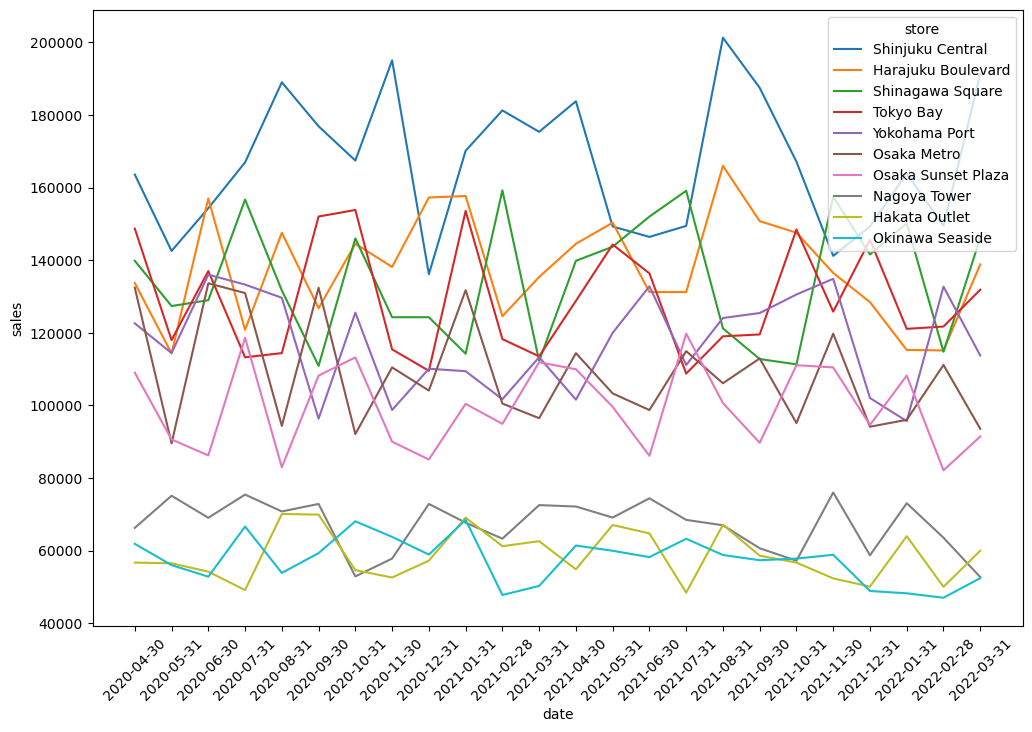

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='sales', hue="store", data=df)
plt.xticks(rotation = 45)
plt.show()

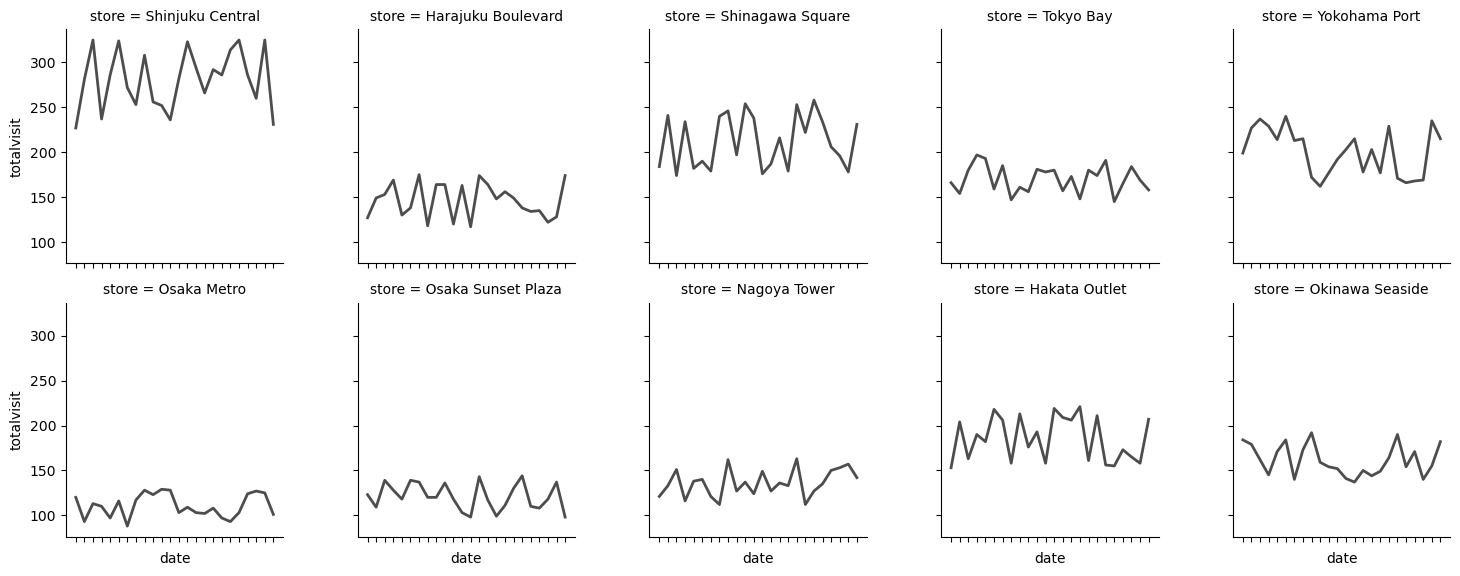

In [16]:
g = sns.FacetGrid(df, col="store", col_wrap=5, height=3)
g.map(sns.lineplot, "date", "totalvisit", color=".3", linewidth=2)
g.set_xticklabels([])
plt.show()